## boilerplate imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy import misc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Download data 

In [2]:
IMAGE_ROOT = "/home/mhuang/data/planes_satellite"
IMAGE_PATH = IMAGE_ROOT + "/images"

DATA_BUNDLE_FILENAME = "planesnet_bundle.zip"
DATA_IMAGES_FILENAME = "planesnet.zip"

In [3]:
!rm -rf $IMAGE_ROOT

In [4]:
!mkdir -p $IMAGE_ROOT

In [5]:
!curl "https://storage.googleapis.com/kaggle-datasets/1197/14776/planesnet.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1525360358&Signature=jybY3hauu%2BOnpVI6Ysu2qBnEzDrUi17xgj7T4B%2Br3i9dAeyrWs3R2mozc9C5gXNfMRDLwCpxsVgK4O13rvChH%2BLfGzVQUgkOGADDQG0fr0g8qsoesOsrg7XrKZByF2AaDKXB7gCEWf4oRwaEHKQcEqQvRV1ci34y9VV2ryd9xAHCmbbrXkxIdYyZhiQe%2FUZxqaa0CmS%2FvstA5LtN7tDVCWE8NWUJbMhd8e0i0Zk9in8CyqIlH2jSyxAJI7IvUaELZgagIRAdbfsRkL13fyiQEeiOXHb2Ap34oQshqiyYq%2BJ%2FH3A549OHJRdzlX10bljf6kwOYPwpJQZW73Q%2BO9126Q%3D%3D" > $IMAGE_ROOT/$DATA_BUNDLE_FILENAME

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72.5M  100 72.5M    0     0  71.6M      0  0:00:01  0:00:01 --:--:-- 71.6M


In [6]:
!unzip -o $IMAGE_ROOT/$DATA_BUNDLE_FILENAME -d $IMAGE_ROOT

Archive:  /home/mhuang/data/planes_satellite/planesnet_bundle.zip
  inflating: /home/mhuang/data/planes_satellite/planesnet.json  
  inflating: /home/mhuang/data/planes_satellite/planesnet.zip  


In [7]:
!unzip -q -t $IMAGE_ROOT/$DATA_IMAGES_FILENAME

No errors detected in compressed data of /home/mhuang/data/planes_satellite/planesnet.zip.


In [8]:
!unzip -o -q -j $IMAGE_ROOT/$DATA_IMAGES_FILENAME -d $IMAGE_PATH

In [9]:
!ls -ltr $IMAGE_PATH | head

total 128000
-rw-rw-r-- 1 mhuang mhuang  906 Jan 21 19:37 1__20170729_175335_101d__-118.40592455007884_33.93955085537867.png
-rw-rw-r-- 1 mhuang mhuang  764 Jan 21 19:37 1__20170729_175107_1036__-118.41833221627427_33.940172226013956.png
-rw-rw-r-- 1 mhuang mhuang  804 Jan 21 19:37 1__20170728_180813_1039__-121.58701779603875_38.694769242571724.png
-rw-rw-r-- 1 mhuang mhuang  789 Jan 21 19:37 1__20170728_175003_102a__-118.4037708318591_33.941100279947925.png
-rw-rw-r-- 1 mhuang mhuang  863 Jan 21 19:37 1__20170728_175002_102a__-118.40332877746077_33.94671287238693.png
-rw-rw-r-- 1 mhuang mhuang  914 Jan 21 19:37 1__20170727_175114_0f3f__-118.40323269335445_33.946344345012726.png
-rw-rw-r-- 1 mhuang mhuang  929 Jan 21 19:37 1__20170727_175114_0f3f__-118.38581188623972_33.93494470621571.png
-rw-rw-r-- 1 mhuang mhuang  709 Jan 21 19:37 1__20170726_180807_1022__-122.38824470631792_37.61969954191162.png
-rw-rw-r-- 1 mhuang mhuang  841 Jan 21 19:37 1__20170726_174854_0f10__-117.8611940333088

## split images into train and validate using using sklearn

In [10]:
import shutil
import glob
import os.path as path
from sklearn.cross_validation import train_test_split



In [11]:
!rm -rf $IMAGE_PATH/train $IMAGE_PATH/valid $IMAGE_PATH/test

### split negative images first

In [12]:
# reserve some files for testing
TEST_RATIO = 0.05

In [13]:
!mkdir -p $IMAGE_PATH/train/0 $IMAGE_PATH/test/0

# load negave images which always start with "0_"

X_neg = y_neg = glob.glob(path.join(IMAGE_PATH, '0_*.png'))
X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=TEST_RATIO, random_state=None)

# train

for x in X_neg_train:
    
    try:
        shutil.move(x, IMAGE_PATH + "/train/0")
    except OSError as err: 
        print("Error '{}' when moving file {} to target dir {}".format(err, x, target_dir))

# test

for x in X_neg_test:
    
    try:
        shutil.move(x, IMAGE_PATH + "/test/0")
    except OSError as err: 
        print("Error '{}' when moving file {} to target dir {}".format(err, x, target_dir))
        


### then split positive images 

In [14]:
!mkdir -p $IMAGE_PATH/train/1 $IMAGE_PATH/test/1

# load positive images which always start with "1_"

X_pos = y_pos = glob.glob(path.join(IMAGE_PATH, '1_*.png'))
X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=TEST_RATIO, random_state=None)

# train

for x in X_pos_train:
    
    try:
        shutil.move(x, IMAGE_PATH + "/train/1")
    except OSError as err: 
        print("Error '{}' when moving file {} to target dir {}".format(err, x, target_dir))

# test

for x in X_pos_test:
    
    try:
        shutil.move(x, IMAGE_PATH + "/test/1")
    except OSError as err: 
        print("Error '{}' when moving file {} to target dir {}".format(err, x, target_dir))

## create CNN model

In [15]:
# imports

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, InputLayer, BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils
from keras import initializers
from keras import backend as K
from keras.callbacks import TensorBoard

Using TensorFlow backend.


### model params

In [16]:
pool_size = (2, 2)                    # size of poolin area for max pooling
prob_drop_conv = 0.25                  # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5                # drop probability for dropout @ fc layer
image_shape=(20,20,3)

In [17]:
model = Sequential()

# input layer
model.add(InputLayer(input_shape=image_shape))

# batch normalization
model.add(BatchNormalization())

# conv1 layer
model.add(Conv2D(20, (3,3), padding='valid', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Conv2D(40, (3,3), padding='valid', kernel_initializer='random_normal'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Conv2D(60, (3,3), padding='valid', kernel_initializer='random_normal'))
model.add(Activation('relu'))

# max pooling and flatten
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(prob_drop_conv))

# fc1 layer
# what "units" values work best here ??
model.add(Dense(units=60, kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(units=2, kernel_initializer='random_normal'))
model.add(Activation('sigmoid'))

rms = RMSprop(lr=0.001, rho=0.9)
adam = Adam(lr=0.001)
          
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 20, 20, 3)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 3)         12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 20)        560       
_________________________________________________________________
activation_1 (Activation)    (None, 18, 18, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 20)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 40)          7240      
__________

##  set up data generators using Keras Image Generator

### training parameters

In [18]:
BATCH_SIZE=32
VALIDATION_SPLIT=0.20
EPOCHS=100

### training and validation data generator

In [19]:
from keras.preprocessing import image

IMAGE_SIZE=(20,20)

train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT,
    rotation_range=90.0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',    
    )

train_generator = train_datagen.flow_from_directory(
    IMAGE_PATH + "/train",
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
#    save_to_dir='/home/mhuang/augmented_images',
#    save_prefix='aug-'
    )

valid_generator = train_datagen.flow_from_directory(
    IMAGE_PATH + "/train",
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
    )


Found 24320 images belonging to 2 classes.
Found 6080 images belonging to 2 classes.


### evaluation data generator

In [20]:
test_datagen = image.ImageDataGenerator(
    rescale=1./255,
    )

test_generator = test_datagen.flow_from_directory(
    IMAGE_PATH + "/test",
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    )



Found 1600 images belonging to 2 classes.


## plot a few images

In [21]:
def plots(ims, figsize=(12,8), dpi=96, rows=1, interp=False, titles=None, main_title="Diagram"):
    f = plt.figure(figsize=figsize, dpi=dpi)
    plt.title(main_title)
    plt.axis('off')
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=10)
        plt.imshow(ims[i], interpolation=None if interp else 'none', cmap='gray')
        plt.axis('off')

0 (32, 20, 20, 3)


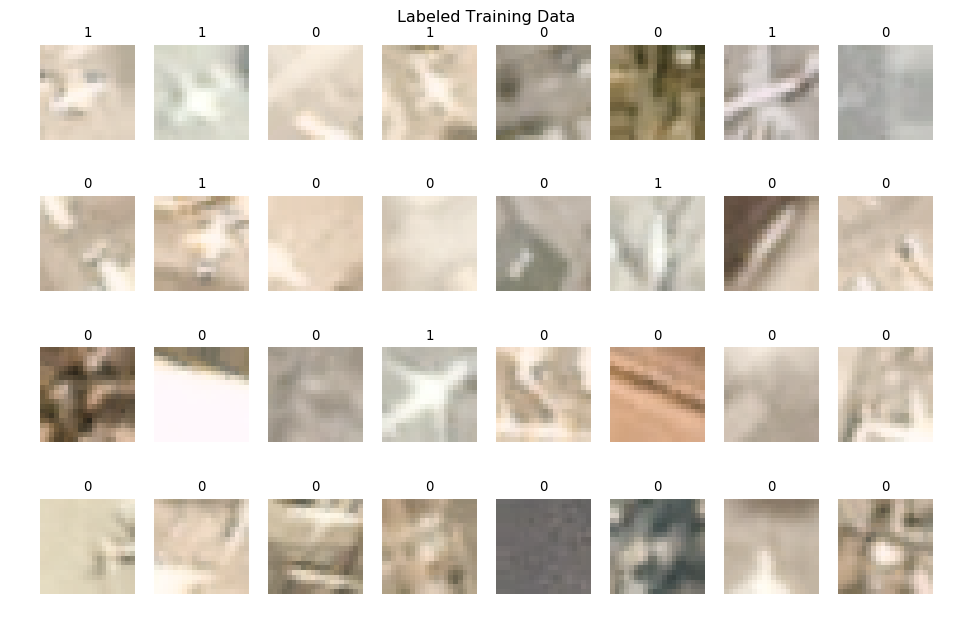

In [22]:
batches=0

for x_batch, y_batch in train_generator:
    print(batches, x_batch.shape)
    label_id = y_batch.argmax(axis=1)
    
    #num_to_dump = 2
    #print(batches, x_batch[:num_to_dump,:,:,:])
    #print(batches, label_id[:num_to_dump])

    plots(x_batch, titles=label_id, rows=4, main_title="Labeled Training Data")
    batches += 1
    if batches >= 1:
        break

## train model

### early stop callback

In [23]:
from keras.callbacks import EarlyStopping

PATIENCE = 20

early_stopping_calllback = EarlyStopping(monitor='val_loss', min_delta=0, patience=PATIENCE, verbose=1, mode='auto')

### tensorboard callback

In [24]:
from keras.callbacks import TensorBoard
import time

timestamp = time.strftime("%Y%m%d-%H%M%S")
log_dir = '/home/mhuang/tensorboard_logs/tutorial/planes_satellite/' + timestamp
print("tensorboard log path: {}".format(log_dir))

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_grads=True, batch_size=2*BATCH_SIZE, write_images=True)

tensorboard log path: /home/mhuang/tensorboard_logs/tutorial/planes_satellite/20180502-171213


### model checkpoint callback

In [25]:
from keras.callbacks import ModelCheckpoint

checkpoint_root = '/home/mhuang/model_checkpoints/planes_satellite'
checkpoint_filename = 'weights.{epoch:02d}-{val_loss:.4f}.hdf5'
checkpoint_filepath = checkpoint_root + '/' + checkpoint_filename

!mkdir -p $checkpoint_root

model_checkpoint_callback = ModelCheckpoint(checkpoint_filepath, save_best_only=True, period=1, verbose=1)

### << TRAINING MODEL >> 

In [26]:
history = model.fit_generator(train_generator, 
                             epochs=EPOCHS,
                             verbose=1,
                             shuffle=True,
                             validation_data=valid_generator,
                             callbacks=[early_stopping_calllback, tensorboard_callback, model_checkpoint_callback]
                             )

Epoch 1/100
760/760 [==============================] - 21s 27ms/step - loss: 0.3037 - binary_accuracy: 0.8649 - val_loss: 0.3336 - val_binary_accuracy: 0.8406

Epoch 00001: val_loss improved from inf to 0.33355, saving model to /home/mhuang/model_checkpoints/planes_satellite/weights.01-0.3336.hdf5
Epoch 2/100
760/760 [==============================] - 20s 26ms/step - loss: 0.2265 - binary_accuracy: 0.9057 - val_loss: 0.2186 - val_binary_accuracy: 0.9197

Epoch 00002: val_loss improved from 0.33355 to 0.21862, saving model to /home/mhuang/model_checkpoints/planes_satellite/weights.02-0.2186.hdf5
Epoch 3/100
760/760 [==============================] - 19s 25ms/step - loss: 0.1927 - binary_accuracy: 0.9224 - val_loss: 0.1830 - val_binary_accuracy: 0.9380

Epoch 00003: val_loss improved from 0.21862 to 0.18297, saving model to /home/mhuang/model_checkpoints/planes_satellite/weights.03-0.1830.hdf5
Epoch 4/100
760/760 [==============================] - 20s 26ms/step - loss: 0.1691 - binary_ac

760/760 [==============================] - 19s 25ms/step - loss: 0.0965 - binary_accuracy: 0.9646 - val_loss: 0.0805 - val_binary_accuracy: 0.9752

Epoch 00036: val_loss did not improve
Epoch 37/100
760/760 [==============================] - 19s 25ms/step - loss: 0.0959 - binary_accuracy: 0.9646 - val_loss: 0.0955 - val_binary_accuracy: 0.9679

Epoch 00037: val_loss did not improve
Epoch 38/100
760/760 [==============================] - 19s 25ms/step - loss: 0.0956 - binary_accuracy: 0.9648 - val_loss: 0.0848 - val_binary_accuracy: 0.9682

Epoch 00038: val_loss did not improve
Epoch 39/100
760/760 [==============================] - 19s 25ms/step - loss: 0.0971 - binary_accuracy: 0.9633 - val_loss: 0.0869 - val_binary_accuracy: 0.9666

Epoch 00039: val_loss did not improve
Epoch 40/100
760/760 [==============================] - 20s 26ms/step - loss: 0.0978 - binary_accuracy: 0.9638 - val_loss: 0.0767 - val_binary_accuracy: 0.9730

Epoch 00040: val_loss did not improve
Epoch 41/100
760/7

760/760 [==============================] - 19s 25ms/step - loss: 0.0827 - binary_accuracy: 0.9694 - val_loss: 0.0605 - val_binary_accuracy: 0.9811

Epoch 00075: val_loss did not improve
Epoch 76/100
760/760 [==============================] - 19s 25ms/step - loss: 0.0846 - binary_accuracy: 0.9691 - val_loss: 0.0830 - val_binary_accuracy: 0.9717

Epoch 00076: val_loss did not improve
Epoch 77/100
760/760 [==============================] - 19s 25ms/step - loss: 0.0840 - binary_accuracy: 0.9687 - val_loss: 0.0721 - val_binary_accuracy: 0.9748

Epoch 00077: val_loss did not improve
Epoch 78/100
760/760 [==============================] - 19s 26ms/step - loss: 0.0887 - binary_accuracy: 0.9688 - val_loss: 0.0945 - val_binary_accuracy: 0.9633

Epoch 00078: val_loss did not improve
Epoch 79/100
760/760 [==============================] - 19s 25ms/step - loss: 0.0852 - binary_accuracy: 0.9679 - val_loss: 0.0794 - val_binary_accuracy: 0.9709

Epoch 00079: val_loss did not improve
Epoch 80/100
760/7

## evaluate

### current model and weights

In [36]:
evaluation = model.evaluate_generator(test_generator)
print('Summary: Loss over the test dataset: %.4f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

Summary: Loss over the test dataset: 0.0861, Accuracy: 0.9669


### evaluate using best saved model and weights

In [28]:
list_of_models = glob.glob(checkpoint_root + '/*.hdf5')
latest_model = max(list_of_models, key=path.getctime)
print(latest_model)

/home/mhuang/model_checkpoints/planes_satellite/weights.60-0.0550.hdf5


In [29]:
from keras.models import load_model

best_model = load_model(latest_model)

In [30]:
evaluation = best_model.evaluate_generator(test_generator)
print('Summary: Loss over the test dataset: %.4f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

Summary: Loss over the test dataset: 0.0655, Accuracy: 0.9788


### using best model, continue training using smaller learning rate

        
best_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['binary_accuracy'])

history = best_model.fit_generator(train_generator, 
                             epochs=EPOCHS,
                             verbose=1,
                             shuffle=True,
                             validation_data=valid_generator,
                             callbacks=[early_stopping_calllback, tensorboard_callback, model_checkpoint_callback]
                             )

## predict

### plot some predictions

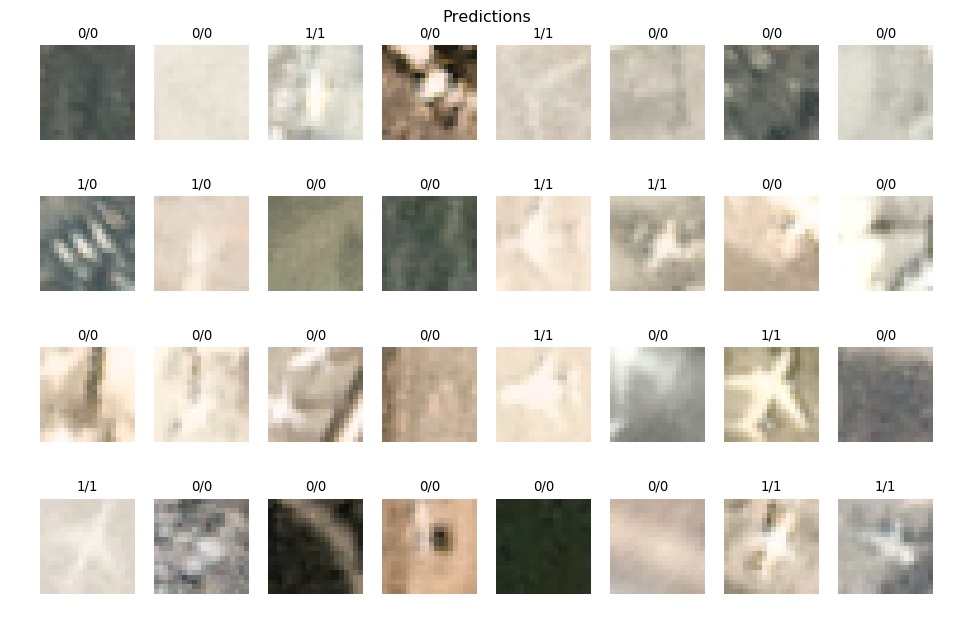

In [33]:
# predict a batch

(X_batch, y_batch) = next(test_generator)

y_batch_true = [str(val) for val in y_batch.argmax(axis=1)]

# make prediction
predictions = best_model.predict(X_batch)

y_batch_predict = [str(val) for val in predictions.argmax(axis=1)]

labels_tuple = zip(y_batch_predict, y_batch_true)
labels = ['/'.join(t) for t in labels_tuple]

plots(X_batch, titles=labels, rows=4, main_title="Predictions")




### plot some mis-predictions

In [34]:
# define larger batch size for generator

large_test_generator = test_datagen.flow_from_directory(
    IMAGE_PATH + "/test",
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=2*BATCH_SIZE,
    class_mode='categorical',
    )

Found 1600 images belonging to 2 classes.


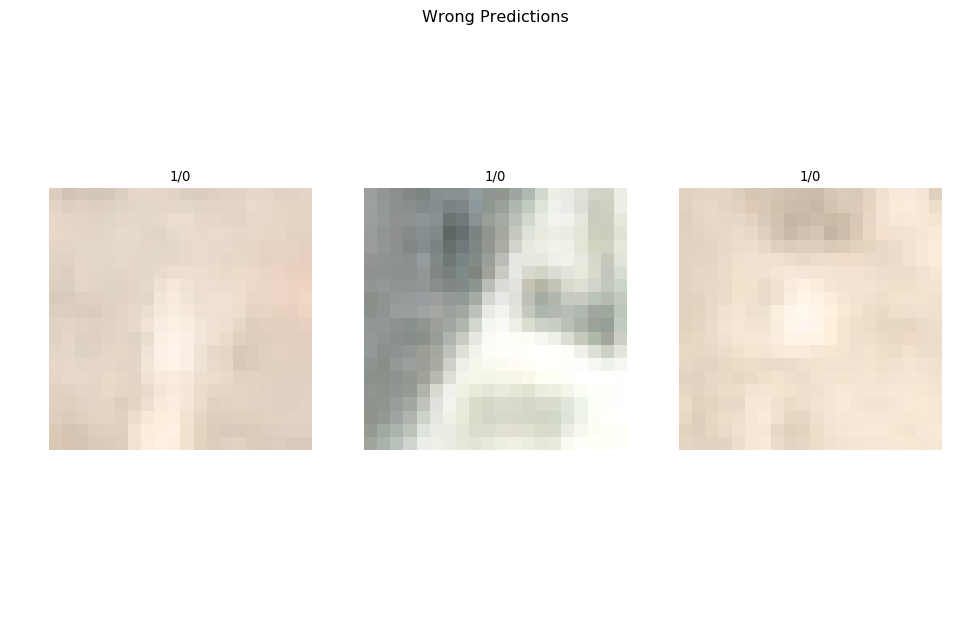

In [35]:
# predict a larger batch

(X_batch, y_batch) = next(large_test_generator)

y_batch_true = [str(val) for val in y_batch.argmax(axis=1)]

# make prediction
predictions = best_model.predict(X_batch)

y_batch_predict = [str(val) for val in predictions.argmax(axis=1)]

labels_tuple = zip(y_batch_predict, y_batch_true)
labels = ['/'.join(t) for t in labels_tuple]

errors = np.array(y_batch.argmax(axis=1)) - np.array(predictions.argmax(axis=1))

error_idx = np.nonzero(errors)[0]

if len(error_idx) > 0:
    X_batch_error = X_batch[error_idx]
    labels_error = [labels[idx] for idx in error_idx]
    
    rows = 1 + (len(error_idx) // 8)
    
    plots(X_batch_error, titles=labels_error, rows=rows, main_title="Wrong Predictions")